# Find the intersection of two images

In [9]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def findRasterIntersect(raster1,band_ind1,raster2,band_ind2):
    # load data
    band1 = raster1.GetRasterBand(band_ind1)
    band2 = raster2.GetRasterBand(band_ind2)
    gt1 = raster1.GetGeoTransform()
    gt2 = raster2.GetGeoTransform()
    
    # find each image's bounding box
    # r1 has left, top, right, bottom of dataset's bounds in geospatial coordinates.
    r1 = [gt1[0], gt1[3], gt1[0] + (gt1[1] * raster1.RasterXSize), gt1[3] + (gt1[5] * raster1.RasterYSize)]
    r2 = [gt2[0], gt2[3], gt2[0] + (gt2[1] * raster2.RasterXSize), gt2[3] + (gt2[5] * raster2.RasterYSize)]
    print '\t1 bounding box: %s' % str(r1)
    print '\t2 bounding box: %s' % str(r2)
    
    # find intersection between bounding boxes
    intersection = [max(r1[0], r2[0]), min(r1[1], r2[1]), min(r1[2], r2[2]), max(r1[3], r2[3])]
    if r1 != r2:
        print '\t** different bounding boxes **'
        # check for any overlap at all...
        if (intersection[2] < intersection[0]) or (intersection[1] < intersection[3]):
            intersection = None
            print '\t***no overlap***'
            return
        else:
            print '\tintersection:',intersection
            left1 = int(round((intersection[0]-r1[0])/gt1[1])) # difference divided by pixel dimension
            top1 = int(round((intersection[1]-r1[1])/gt1[5]))
            col1 = int(round((intersection[2]-r1[0])/gt1[1])) - left1 # difference minus offset left
            row1 = int(round((intersection[3]-r1[1])/gt1[5])) - top1
            
            left2 = int(round((intersection[0]-r2[0])/gt2[1])) # difference divided by pixel dimension
            top2 = int(round((intersection[1]-r2[1])/gt2[5]))
            col2 = int(round((intersection[2]-r2[0])/gt2[1])) - left2 # difference minus new left offset
            row2 = int(round((intersection[3]-r2[1])/gt2[5])) - top2
            
            #print '\tcol1:',col1,'row1:',row1,'col2:',col2,'row2:',row2
            if col1 != col2 or row1 != row2:
                print "*** MEGA ERROR *** COLS and ROWS DO NOT MATCH ***"
            # these arrays should now have the same spatial geometry though NaNs may differ
            array1 = band1.ReadAsArray(left1,top1,col1,row1)
            array2 = band2.ReadAsArray(left2,top2,col2,row2)

    else: # same dimensions from the get go
        col1 = raster1.RasterXSize # = col2
        row1 = raster1.RasterYSize # = row2
        array1 = band1.ReadAsArray()
        array2 = band2.ReadAsArray()
        
    return array1, array2, col1, row1, intersection

In [5]:
img1_file = '/neponset/nbdata06/albedo/zhan.li/sentinel-2/l2a/S2A_USER_PRD_MSIL2A_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_TrueColor_RegLandsat_20m.jp2.bin'
img2_file = '/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_sr_true_color.bin'

In [7]:
image1_ds = gdal.Open(img1_file)
image2_ds = gdal.Open(img2_file)

In [8]:
image1_isect_array, image2_isect_array, col, row, isect_bb = findRasterIntersect(image1_ds, 1, image2_ds, 1)

	1 bounding box: [299955.0, 4800015.0, 409845.0, 4690215.0]
	2 bounding box: [231585.0, 4902615.0, 468315.0, 4662285.0]
	** different bounding boxes **
	intersection: [299955.0, 4800015.0, 409845.0, 4690215.0]


In [21]:
image2_isect_array

array([[  292,   176,   162, ...,   126,   124,   124],
       [  362,   202,   177, ...,   125,   130,   125],
       [  189,   177,   206, ...,   125,   125,   124],
       ..., 
       [-9999, -9999, -9999, ...,   144,   148,   146],
       [-9999, -9999, -9999, ...,   145,   148,   146],
       [-9999, -9999, -9999, ...,   145,   148,   144]], dtype=int16)

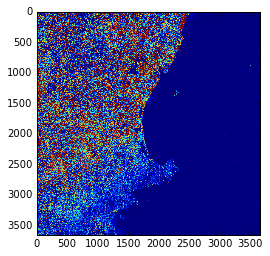

In [24]:
imgplot1 = plt.imshow(image1_isect_array, vmin=10, vmax=2000)

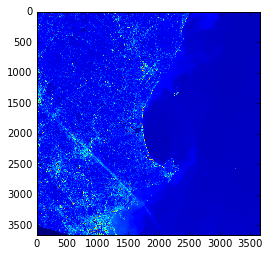

In [25]:
imgplot2 = plt.imshow(image2_isect_array, vmin=10, vmax=2000)

In [16]:
raster1 = gdal.Open(img1_file)
raster2 = gdal.Open(img2_file)

# load data
band1 = raster1.GetRasterBand(1)
band2 = raster2.GetRasterBand(1)
gt1 = raster1.GetGeoTransform()
gt2 = raster2.GetGeoTransform()

# find each image's bounding box
# r1 has left, top, right, bottom of dataset's bounds in geospatial coordinates.
r1 = [gt1[0], gt1[3], gt1[0] + (gt1[1] * raster1.RasterXSize), gt1[3] + (gt1[5] * raster1.RasterYSize)]
r2 = [gt2[0], gt2[3], gt2[0] + (gt2[1] * raster2.RasterXSize), gt2[3] + (gt2[5] * raster2.RasterYSize)]
print '\t1 bounding box: %s' % str(r1)
print '\t2 bounding box: %s' % str(r2)

# find intersection between bounding boxes
intersection = [max(r1[0], r2[0]), min(r1[1], r2[1]), min(r1[2], r2[2]), max(r1[3], r2[3])]
if r1 != r2:
    print '\t** different bounding boxes **'
    # check for any overlap at all...
    if (intersection[2] < intersection[0]) or (intersection[1] < intersection[3]):
        intersection = None
        print '\t***no overlap***'
    else:
        print '\tintersection:',intersection
        left1 = int(round((intersection[0]-r1[0])/gt1[1])) # difference divided by pixel dimension
        top1 = int(round((intersection[1]-r1[1])/gt1[5]))
        col1 = int(round((intersection[2]-r1[0])/gt1[1])) - left1 # difference minus offset left
        row1 = int(round((intersection[3]-r1[1])/gt1[5])) - top1

        left2 = int(round((intersection[0]-r2[0])/gt2[1])) # difference divided by pixel dimension
        top2 = int(round((intersection[1]-r2[1])/gt2[5]))
        col2 = int(round((intersection[2]-r2[0])/gt2[1])) - left2 # difference minus new left offset
        row2 = int(round((intersection[3]-r2[1])/gt2[5])) - top2

        #print '\tcol1:',col1,'row1:',row1,'col2:',col2,'row2:',row2
        if col1 != col2 or row1 != row2:
            print "*** MEGA ERROR *** COLS and ROWS DO NOT MATCH ***"
        # these arrays should now have the same spatial geometry though NaNs may differ
        array1 = band1.ReadAsArray(left1,top1,col1,row1)
        array2 = band2.ReadAsArray(left2,top2,col2,row2)

else: # same dimensions from the get go
    col1 = raster1.RasterXSize # = col2
    row1 = raster1.RasterYSize # = row2
    array1 = band1.ReadAsArray()
    array2 = band2.ReadAsArray()

	1 bounding box: [299955.0, 4800015.0, 409845.0, 4690215.0]
	2 bounding box: [231585.0, 4902615.0, 468315.0, 4662285.0]
	** different bounding boxes **
	intersection: [299955.0, 4800015.0, 409845.0, 4690215.0]


In [18]:
print left1, top1, col1, row1

0 0 3663 3660


In [19]:
print left2, top2, col2, row2

2279 3420 3663 3660


In [20]:
print gt1
print gt2

(299955.0, 30.0, 0.0, 4800015.0, 0.0, -30.0)
(231585.0, 30.0, 0.0, 4902615.0, 0.0, -30.0)
